#                                                               Esercitazione 7-8
## 4 e 18 Aprile 2023

## Nota 1.
La funzione *scipy.linalg.lu(A)*  , presa in input una matrice A a rango massimo, restituisce in output le matrici $P^T$,L,U,  della fattorizzazione di LU della matrice A in maniera tale che PA=LU (restituisce la matrice di permutazione trasposta)

In [1]:
import numpy as np
import scipy as sp
from scipy.linalg import lu
A=np.array([[2,1],[3,4]])
PT,L,U=lu(A)  #Restituisce in output la trasposta della matrice di Permutazione
P=PT.T.copy()   #P è la matrice di permutazione
print("A=",A)
print("L=",L)
print("U=",U)
print("P=",P)
#LU è la fattorizzazione di P*A (terorema 2)
A1=P@A # equivale al prodotto matrice x matrice np.dot(P,A)
A1Fatt=L@U # equivale a np.dot(L,U)
print("Matrice P*A \n", A1)
print("Matrice ottenuta moltipicando Le ed U \n",A1Fatt)


A= [[2 1]
 [3 4]]
L= [[1.         0.        ]
 [0.66666667 1.        ]]
U= [[ 3.          4.        ]
 [ 0.         -1.66666667]]
P= [[0. 1.]
 [1. 0.]]
Matrice P*A 
 [[3. 4.]
 [2. 1.]]
Matrice ottenuta moltipicando Le ed U 
 [[3. 4.]
 [2. 1.]]


## Nota 2
La funzione *scipy.linalg.cholesky(a, lower=True)*, presa in input una matrice simmetrica e definta positiva restituisce in output la matrice L triangolare inferiore tale che $A=L \cdot L^T$. Se la matrice simmetrica in input non è  definita positiva, restituisce un errore.

In [2]:
from scipy.linalg import cholesky
A=np.array([[2,1,3],[1,5,7],[3,7,12]])
print(A)

[[ 2  1  3]
 [ 1  5  7]
 [ 3  7 12]]


In [3]:
L=cholesky(A,lower=True)
print(L)
A1=L@L.T
print("A1=\n",A1)

[[1.41421356 0.         0.        ]
 [0.70710678 2.12132034 0.        ]
 [2.12132034 2.59272486 0.8819171 ]]
A1=
 [[ 2.  1.  3.]
 [ 1.  5.  7.]
 [ 3.  7. 12.]]


## Nota 3
La funzione *scipy.linalg.qr(a)*, presa in input una matrice A (nxn)  a rango massimo, restituisce in output le matrici Q (ortogonale di dimensione nxn) ed una matrice R (nxn) triangolare superiore tale che $A=Q \cdot R$

In [4]:
from scipy.linalg import qr
A=np.array([[2,1,3],[1,5,7],[3,7,12]])
Q,R=qr(A)
print("Q= \n",Q)
print("R= \n",R)
A1=Q@R
print(A1)

Q= 
 [[-0.53452248  0.6882472  -0.49051147]
 [-0.26726124 -0.6882472  -0.67445327]
 [-0.80178373 -0.22941573  0.55182541]]
R= 
 [[ -3.74165739  -7.48331477 -13.09580085]
 [  0.          -4.35889894  -5.50597761]
 [  0.           0.           0.42919754]]
[[ 2.  1.  3.]
 [ 1.  5.  7.]
 [ 3.  7. 12.]]


## Esercizio 1. 
Facendo uso dei numpy array, implementare una funzione Lsolve(L,b), che, presa  in input una matrice L, triangolare inferiore,  e il vettore termine noto b, risolva il sistema lineare Lx=b, con il metodo della sostituzione in avanti e restituisca in output: la soluzione del sistema lineare ed un flag: flag=  0, se sono soddisfatti i criteri di applicabilità flag= 1, se non sono soddisfatti. (NB. Come test di applicabilità controllare che la matrice L sia quadrata e che non si annulli nessun elemento della diagonale).

In [35]:
def Lsolve(L, b):
    flag = 0
    #test sulla dimensione
    m,n = L.shape
    if n != m:
        print("Matrice non quadrata")
        flag = 1
        x = []
        return x, flag

    #Test singolarità
    if np.all(np.diag(L)) != True:
        print("Elemento diagonale nullo")
        x = []
        flag = 1
        return x, flag
    
    x = np.zeros((n, 1))
    
    for i in range(n):
        s = np.dot(L[i,0:i], x[0:i]) #prodotto scalare tra riga i-esima di L e le i-1 componenti della soluzione al momento calcolate
        x[i] = (b[i] - s)/L[i,i]
        
    return x,flag

In [36]:
L = np.array([[2,0,0], [3,2,0], [4,3,1]])
b = np.sum(L, axis=1).reshape(3,1)
x,flag = Lsolve(L, b) 
print("Soluzione \n", x)

Soluzione 
 [[1.]
 [1.]
 [1.]]


## Esercizio 2. 
Facendo uso dei numpy array, implementare una funzione Usolve(L,b), che, presa  in input una matrice U, triangolare superiore,  e il vettore termine noto b, risolva il sistema lineare Ux=b, con il metodo della sostituzione all'indietro e restituisca in output: la soluzione del sistema lineare ed un flag: flag=  0, se sono soddisfatti i criteri di applicabilità flag= 1, se non sono soddisfatti. (NB. Come criteri di applicabilità controllare che la matrice L sia quadrata e che non si annulli nessun elemento della diagonale).

In [39]:
def Usolve(U, b):
    flag = 0
    #Test sulla dimensione
    m, n = L.shape
    if n != m:
        print("Matrice non quadrata")
        flag = 1
        x = []
        return x, flag
    
    #Test singolarità
    if np.all(np.diag(U)) != True:
        print("Elemento diagonale nullo")
        x = []
        flag = 1
        return x, flag
    
    x = np.zeros((n, 1))
    #Ciclo da n-1 a 0, quindi con passo -1
    for i in range(n-1, -1, -1):
        s = np.dot(U[i, i+1:n], x[i+1:n]) #prodotto scalare tra riga i-esima di U e le componenti della soluzione al momento calcolate (da i+1 a n)
        x[i] = (b[i] - s)/U[i, i]
        
    return x, flag

In [40]:
U = L.copy().T
b = np.sum(U, axis=1).reshape(3,1)
x, flag = Usolve(U, b)
print("Soluzione \n", x)

Soluzione 
 [[1.]
 [1.]
 [1.]]


## Esercizio 3
- si implementi una function LUsolve(P,A,L,U,b) che risolve il sistema lineare Ax=b nel caso di fattorizzazione $PA = LU$ assegnata,
combinando i metodi di risoluzione in avanti ed all'indietro  precedentemente implementati.
- si testi sulla matrice A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]]) con termine noto b scelto in maniera tale che la soluzione esatta del sistema lineare sia il vettore formato da tutti 1.

In [43]:
def LUsolve(P,L,U,b):
    Pb = np.dot(P, b)
    y, flag = Lsolve(L, Pb)
    if flag==0:
        x, flag = Usolve(U, y)
    else:
        return [], flag
    
    return x, flag

In [44]:
A = np.array([[2,5,8,7], [5,2,2,8], [7,5,6,6], [5,4,4,8]])
b = np.sum(A, axis=1).reshape(4,1)
PT, L, U = lu(A)
P = PT.T.copy()
x, flag = LUsolve(P,L,U,b)
print("Soluzione \n", x)

NameError: name 'lu' is not defined

## Esercizio 4
Si implementi una function *solve_nsis(A,B)* per il calcolo della soluzione di un generale sistema lineare $AX = B$, con $X, B$ matrici, che usi la fattorizzazione LU della matrice PA, per risolvere n sistemi lineari: aventi la stessa matrice dei coefficienti A e termine noto l'i-esima colonna della matrice B. 
Utilizzarla poi per il calcolo dell'inversa delle
matrici non singolari
$$
A=\left[
\begin{array}{ccc}
3 & 5 & 7\\
2 & 3 & 4\\
5 & 9 & 11
\end{array}
\right ], \qquad
A=\left[
\begin{array}{cccc}
1 & 2 & 3 & 4\\
2 & -4 & 6 & 8\\
-1 & -2 & -3 & -1\\
5 & 7 & 0 & 1
\end{array}
\right ],
$$
confrontando i risultati ottenuti con l'output
della funzione  *scipy.linalg.inv(A)*

## Esercizio 5
Sfruttando la fattorizzazione PA=LU  di una delle matrici del punto precedente, calcolarne il determinante.


## Esercizio 6
Per valori di $n = 4 : 6 : 40$, si consideri il sistema lineare $A_n x = b$ con
$A_n$ matrice di Hankel di ordine $n$ di elementi
$$
a^{(n)}_{i,n+k-i}
=
\left \{
\begin{array}{ll}
2^k & \hbox{se} \ k > 0,\\
2^{1/(2-k)} & \hbox{se} \ k \leq 0,
\end{array}
\right .
\qquad
i = 1, ..., n, \ \  k = i + 1-n, ..., i,
$$
e $b$ scelto in modo che risulti $x = [1, 1, ..., 1]^T$. Si risolva tale sistema
con il metodo di fattorizzazione LU della matrice PA
e il metodo di fattorizzazione QR (Q,R  =scipy.linalg.qr(A)).
Calcolare gli errori relativi $\| \delta x \|_2/\|x\|_2$ da cui sono affette
le soluzioni calcolate con i due metodi e produrre, al variare di $n$, un
grafico in scala logaritmica ( matplotlib.plyplot.loglog) degli errori relativi calcolati. Che cosa si
osserva?

Ripetere l'esercizio precedente per risolvere il sistema lineare $Ax = b$
con $A$ e $b$ cos\`i  definiti:
$$
a^{(n)}_{i,j}=
\left \{
\begin{array}{ll}
1 & \hbox{se} \ i=j \ \hbox{o \, se} \ j=n,\\
-1 & \hbox{se} \ i>j,\\
0 & \hbox{altrimenti}
\end{array}
\right .
\qquad
b = A \cdot [1, ..., 1]^T,
$$
per $n = 48 : 2 : 58$ e $b$ scelto in modo che risulti $x = [1, 1, ..., 1]^T$. Che
cosa si osserva?


## Esercizio 7
Implementare la  funzione $jacobi(A,b,x0,toll,itmax)$ per risolvere il  sistema lineare Ax=b utilizzando il Metodo iterativo di Jacobi. 
La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- toll: tolleranza per il criterio di arresto
- itmax: iterazioni massime oltre le quali il metodo si ferma

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente l'errore tra due iterazioni successive $||x^{(k)}-x^{(k-1)}||/||x^{(k)}||$
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta


Calcolare il raggio spettrale della matrice di iterazione.

Implementare un criterio di arresto per il procedimento iterativo in termini di : $||x^{(k)}-x^{(k-1)}||/||x^{(k)}|| <toll$

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def jacobi(A,b,x0,toll,itmax):
    #Le funzioni possono vedere le variabili del main, ma non  modificarle
    n = A.shape[0]  #n = numero righe di A
    d = np.diag(A)  #vettore diagonale di A
    D = np.diag(d)  #costruisce la matrice che ha sulla diagonale il vettore d
    invM = np.diag(1/d)  #M=D e la sua inversa quindi è la matrice diagonale con i reciproci del vettore d
    E = np.tril(A, -1)  #matrice triangolare inferiore, partendo dalla sottodiagonale
    F = np.triu(A, 1)  #matrice triangolare superiore, partendo dalla sopradiagonale
    N = -(E + F)
    #controllo raggio spettrale per vedere se converge e in tal caso alla soluzione
    T = np.dot(invM, N)  #T=invM*N ERRORE!!! Perchè non è il prodotto scalare
    autovalori = np.linalg.eigvals(T)
    raggiospettrale = np.max(np.abs(autovalori))  #Come fare la norma infinito
    print("Raggio spettrale: ", raggiospettrale)
    
    it = 0
    errore = 1000
    er_vet = []
    while it <= itmax and errore >= toll:
        x = (b+N@x0)/d.reshape(n,1)
        errore = np.linalg.norm(x-x0)/np.linalg.norm(x)
        er_vet.append(errore)
        x0 = x.copy()  #IMPORTANTE!!!
        it = it + 1
    return x, it, er_vet

Raggio spettrale:  0.5586853131416272
Sol Jac =  [[1.]
 [1.]
 [1.]] 
it Jac 35


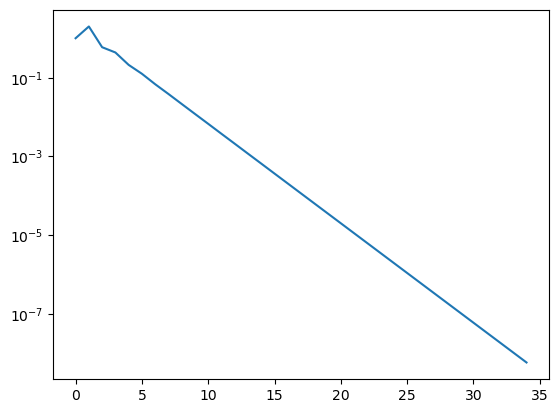

In [9]:
A = np.array([[4,1,3], [3,4,1], [1,1,17]])
n = A.shape[0]  #do per scontato che sia quadrata altrimeti dovrei controllare che A.shape[0]=A.shape[1]
b = np.sum(A, axis=1).reshape(n,1)
x0 = np.zeros((n,1))
toll = 1e-8
itmax = 100
solJac, it_Jac, err_vet_Jac = jacobi(A,b,x0,toll,itmax)
print("Sol Jac = ", solJac, "\nit Jac", it_Jac)
plt.semilogy(np.arange(it_Jac), err_vet_Jac)
#La soluzione deve essere un vettore di 1, il raggio spettrale deve essere < 1

## Esercizio 8
Implementare la  funzione $gauss$_$seidel(A,b,x0,toll,itmax)$ per risolvere il  sistema lineare Ax=b utilizzando il Metodo iterativo di Gauss-Seidel. 
La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- toll: tolleranza per il criterio di arresto
- itmax: iterazioni massime oltre le quali il metodo si ferma

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente l'errore tra due iterazioni successive $||x^{(k)}-x^{(k-1)}||/||x^{(k)}||$
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta

Calcolare il raggio spettrale della matrice di iterazione.

Implementare un criterio di arresto per il procedimento iterativo in termini di : $||x^{(k)}-x^{(k-1)}||/||x^{(k)}|| <toll$

In [10]:
def gauss_seidel(A,b,x0,toll,itmax):
    #Le funzioni possono vedere le variabili del main, ma non  modificarle
    n = A.shape[0]  #n = numero righe di A
    d = np.diag(A)  #vettore diagonale di A
    D = np.diag(d)  #costruisce la matrice che ha sulla diagonale il vettore d
    E = np.tril(A, -1)  #matrice triangolare inferiore, partendo dalla sottodiagonale
    F = np.triu(A, 1)  #matrice triangolare superiore, partendo dalla sopradiagonale
    M = D+E
    invM = np.linalg.inv(M)
    N = -F
    #controllo raggio spettrale per vedere se converge e in tal caso alla soluzione
    T = np.dot(invM, N)  #T=invM*N ERRORE!!! Perchè non è il prodotto scalare
    autovalori = np.linalg.eigvals(T)
    raggiospettrale = np.max(np.abs(autovalori))  #Come fare la norma infinito
    print("Raggio spettrale: ", raggiospettrale)
    
    it = 0
    errore = 1000
    err_vet = []
    while it <= itmax and errore >= toll:
        x, flag = Lsolve(M, b+N@x0)
        errore = np.linalg.norm(x-x0)/np.linalg.norm(x)
        err_vet.append(errore)
        x0 = x.copy()  #IMPORTANTE!!!
        it = it + 1
    return x, it, err_vet

In [11]:
A = np.array([[4,1,3], [3,4,1], [1,1,17]])
n = A.shape[0]  #do per scontato che sia quadrata altrimeti dovrei controllare che A.shape[0]=A.shape[1]
b = np.sum(A, axis=1).reshape(n,1)
x0 = np.zeros((n,1))
toll = 1e-8
itmax = 100
solGS, it_GS, err_vet_GS = gauss_seidel(A,b,x0,toll,itmax)
print("Sol Gauss-Seidel = \n", solGS, "\nit Gauss-Seidel", it_GS)
plt.semilogy(np.arange(it_GS), err_vet_GS)
#La soluzione deve essere un vettore di 1, il raggio spettrale deve essere < 1

Raggio spettrale:  0.1943151503079159


NameError: name 'Lsolve' is not defined

## Esercizio 9
Testare i metodi di Jacobi e di Gauss Seidel nella soluzione dei - sistemai lineare Ax=b, dove 
- A=np.array([[4,1,3],[3,4,1],[1,1,17]]) 
- A=np.array([[3,0, 4],[7, 4, 3],[-1, -1 ,-2]])
- A=np.array([[5, 0, -1, 2],[ -2, 4, 1, 0],[0, -1, 4, -1],[ 2, 0, 0, 3]])

ed il termine noto del sistema è scelto in maniera tale che la soluzione esatta del sistema sia il vettore fatto da tutti 1.
Visualizzare in un grafico in scala logaritmica  l'errore per ogni iterazione per ciascun metodo. Cosa si osserva?
Porre toll=1e-8 it_max=500 e x0=np.zeros(A.shape[0])

Raggio spettrale:  1.3748593749588482
Sol Jac =  [[7.98519558e+13]
 [1.46556882e+14]
 [8.23389075e+13]] 
it Jac 101
Raggio spettrale:  0.1250000000000001


NameError: name 'Lsolve' is not defined

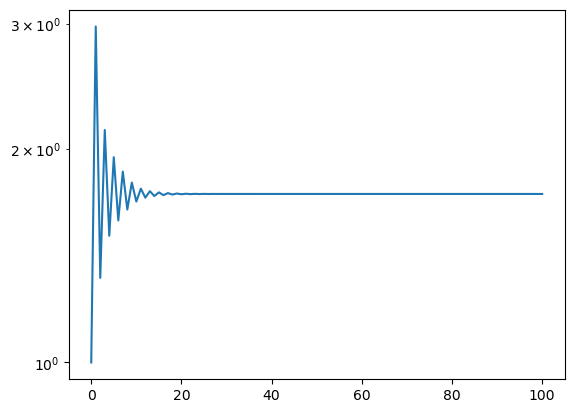

In [12]:
A = np.array([[3,0,4], [7,4,3], [-1,-1,-2]])
A1 = np.array([[5,0,-1,2], [-2,4,1,0], [0,-1,4,-1], [2,0,0,3]])
toll = 1e-8
it_max = 500
n = A.shape[0]
b = np.sum(A, axis=1).reshape(n,1)
x0 = np.zeros((n,1))
solJac, it_Jac, err_vet_Jac = jacobi(A,b,x0,toll,itmax)
print("Sol Jac = ", solJac, "\nit Jac", it_Jac)
plt.semilogy(np.arange(it_Jac), err_vet_Jac)
solGS, it_GS, err_vet_GS = gauss_seidel(A,b,x0,toll,itmax)
print("Sol Gauss-Seidel = \n", solGS, "\nit Gauss-Seidel", it_GS)
plt.semilogy(np.arange(it_GS), err_vet_GS)

n = A1.shape[0]
x0 = np.zeros((n,1))
b = np.sum(A1, axis=1).reshape(n,1)
solJac1, it_Jac1, err_vet_Jac1 = jacobi(A1,b,x0,toll,itmax)
print("Sol Jac = ", solJac1, "\nit Jac", it_Jac1)
plt.semilogy(np.arange(it_Jac1), err_vet_Jac1)
solGS1, it_GS1, err_vet_GS1 = gauss_seidel(A1,b,x0,toll,itmax)
print("Sol Gauss-Seidel = \n", solGS1, "\nit Gauss-Seidel", it_GS1)
plt.semilogy(np.arange(it_GS1), err_vet_GS1)

## Esercizio 10
Implementare la  funzione $gauss$_$seidel$_sor(A,b,x0,omega, toll,itmax) per risolvere il  sistema lineare Ax=b utilizzando il Metodo iterativo di Gauss-Seidel-SOR
La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- omega: il parametro di rilassamento
- toll: tolleranza per il criterio di arresto
- itmax: iterazioni massime oltre le quali il metodo si ferma

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente l'errore tra due iterazioni successive $||x^{(k)}-x^{(k-1)}||/||x^{(k)}||$
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta

Calcolare il raggio spettrale della matrice di iterazione.

Implementare un criterio di arresto per il procedimento iterativo in termini di : $||x^{(k)}-x^{(k-1)}||/||x^{(k)}|| <toll$

In [13]:
def gauss_seidel_sor(A,b,x0,omega,toll,itmax):
    #Le funzioni possono vedere le variabili del main, ma non  modificarle
    n = A.shape[0]  #n = numero righe di A
    d = np.diag(A)  #vettore diagonale di A
    D = np.diag(d)  #costruisce la matrice che ha sulla diagonale il vettore d
    E = np.tril(A, -1)  #matrice triangolare inferiore, partendo dalla sottodiagonale
    F = np.triu(A, 1)  #matrice triangolare superiore, partendo dalla sopradiagonale
    M = D+E
    invM = np.linalg.inv(M)
    N = -F
    #controllo raggio spettrale per vedere se converge e in tal caso alla soluzione
    T = np.dot(invM, N)  #T=invM*N ERRORE!!! Perchè non è il prodotto scalare
    autovalori = np.linalg.eigvals(T)
    raggiospettrale = np.max(np.abs(autovalori))  #Come fare la norma infinito
    print("Raggio spettrale: ", raggiospettrale)
    
    it = 0
    errore = 1000
    err_vet = []
    while it <= itmax and errore >= toll:
        xtilde, flag = Lsolve(M, b+N@x0)
        x, flag = (1-omega)*x0 + omega*xtilde
        errore = np.linalg.norm(x-x0)/np.linalg.norm(x)
        err_vet.append(errore)
        x0 = x.copy()  #IMPORTANTE!!!
        it = it + 1
    return x, it, err_vet

In [14]:
A1 = np.array([[5,0,-1,2], [-2,4,1,0], [0,-1,4,-1], [2,0,0,3]])
toll = 1e-8
it_max = 500
n = A.shape[0]
x0 = np.zeros((n,1))
b = np.sum(A, axis=1).reshape(n,1)
solGS, it_GS, err_vet_GS = gauss_seidel_sor(A,b,x0,1.0,toll,itmax)
print("Sol Gauss-Seidel = \n", solGS, "\nit Gauss-Seidel", it_GS)
plt.semilogy(np.arange(it_GS), err_vet_GS)

Raggio spettrale:  0.1250000000000001


NameError: name 'Lsolve' is not defined

## Esercizio 11
Scrivere una funzione creaPoisson(n) che preso in input l'ordine della matrice quadrata di Poisson la costruzione secondo la seguente formula:
$$A =
\left [
\begin{array}{ccccccccccc}
4 & -1 & 0 & -1 &0 &0 & 0& 0& \cdots &   0 & 0\\
-1 & 4 & -1 & 0  &-1 &0 & 0& 0& \cdots &   0 & 0\\
0 & -1 & 4 & -1  &0 &-1 & 0& 0& \cdots &   0 & 0 \\
-1 & 0 & -1 & 4  &-1 &0  & -1 & 0& \cdots &   0 & 0\\
0 & -1 & 0 & -1  & 4 &-1 & 0 & -1& \cdots &   0 & 0\\
0 & 0 & -1 & 0  & -1 &4 & -1 & 0&  -1 & 0 & 0 \\
0 & 0 & 0 & \ddots  & 0 &\ddots & \ddots & \ddots& \ddots & \ddots & 0\\
0 & 0 & 0 & 0  & -1 &0  & -1 & 4& -1 &   0& -1\\
\end{array}
 \right ], \qquad
$$
- Risolvere il sistema lineare Ax=b con matrice dei coefficienti A di Poisson di ordine 10 e termine noto b scelto in maniera tale che il sistema abbia soluzione il vettore x con tutte le componenti  uguali ad 1, utilizzando  il metodo iterativo di Jacobi, Gauss-Seidel e Gauss-Seidel-Sor con parametro omega scelto tra 1 e 2 in maniera tale che il raggio spettrale della matrice di iterazione sia il più piccolo possibile e confrontare su un unico grafico l'andamento degli errori in scala logaritmica. Usare toll=1e-10.

## Esercizio 12
Implementare una funzione **steepestdescent(A,b,x0,itmax,tol)** che implementa il metodo di discesa più ripida del gradiente per risolvere il sistema lineare Ax=b, con A matrice simmetrica e definita positiva. La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- itmax: iterazioni massime oltre le quali il metodo si ferma
- toll: tolleranza per il criterio di arresto

e restituisce in output:
- il vettore soluzione
- un vettore di tante componenti quanto il numero di iterazioni effettuate, contenente la
  norma del residuo iterazione per iterazione
- il numero di iterazioni impiegate per calcolare la soluzione con la tolleranza richiesta

Usare come criterio di arresto $norm(r(k),2) < toll$

## Esercizio 13
Testare il metodo del gradiente sull'esempio dell'esercizio 11